# IRIS MODEL #

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data)
Y = pd.DataFrame(data.target)

In [21]:
X.head(20)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [22]:
Y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
Y_train

,0
54,1
108,2
112,2
17,0
119,2
...,...
133,2
137,2
72,1
140,2


In [26]:
print(X_train)

[[ 8.03473255e-01 -5.38815906e-01  4.54452640e-01  3.79466037e-01]
 [ 1.04344393e+00 -1.25723711e+00  1.13159715e+00  7.69376094e-01]
 [ 1.16342927e+00 -5.98684340e-02  9.62311023e-01  1.15928615e+00]
 [-8.76321497e-01  1.13750025e+00 -1.35126605e+00 -1.18017419e+00]
 [ 2.03546558e-01 -1.97565832e+00  6.80167477e-01  3.79466037e-01]
 [ 5.63502576e-01 -2.99342170e-01  1.01873973e+00  7.69376094e-01]
 [ 9.23458594e-01 -2.99342170e-01  4.54452640e-01  1.19525999e-01]
 [ 2.24329733e+00 -1.01776338e+00  1.75231295e+00  1.41922619e+00]
 [-1.56409460e-01  1.85592145e+00 -1.18197993e+00 -1.18017419e+00]
 [-9.96306836e-01  1.37697398e+00 -1.35126605e+00 -1.31014421e+00]
 [-1.23627752e+00 -5.98684340e-02 -1.35126605e+00 -1.18017419e+00]
 [-7.56336157e-01 -7.78289642e-01  5.94516758e-02  2.49496018e-01]
 [-8.76321497e-01  8.98026510e-01 -1.29483735e+00 -1.31014421e+00]
 [-3.96380139e-01  1.13750025e+00 -1.40769476e+00 -1.31014421e+00]
 [ 2.24329733e+00  1.85592145e+00  1.63945553e+00  1.28925617e

In [27]:
print(X_test)

[[-0.03642412  2.33486893 -1.46412347 -1.31014421]
 [-0.8763215  -1.25723711 -0.44840671 -0.14041404]
 [ 0.92345859 -0.05986843  0.34159522  0.24949602]
 [-0.51636548  2.09539519 -1.40769476 -1.05020417]
 [ 2.48326801  1.85592145  1.47016941  1.02931613]
 [ 0.56350258  0.65855277  0.51088135  0.50943606]
 [ 1.28341461  0.1796053   0.73659619  1.41922619]
 [-0.8763215   1.85592145 -1.06912251 -1.05020417]
 [-1.35626285  0.41907904 -1.23840864 -1.31014421]
 [ 1.28341461  0.41907904  1.07516844  1.41922619]
 [-0.2763948  -0.77828964  0.2287378   0.119526  ]
 [-0.51636548  2.09539519 -1.18197993 -1.05020417]
 [ 1.52338529 -0.05986843  1.18802586  1.15928615]
 [ 0.68348792  0.41907904  0.39802393  0.37946604]
 [ 0.20354656 -0.29934217  0.39802393  0.37946604]
 [-1.71621887  0.41907904 -1.40769476 -1.31014421]
 [-0.03642412 -1.01776338  0.11588038 -0.01044402]
 [-0.2763948  -0.05986843  0.39802393  0.37946604]
 [-0.51636548  0.89802651 -1.29483735 -1.05020417]
 [-0.99630684  0.41907904 -1.46

In [28]:
def m_d(a , b , p = 1):
    dis = np.sum(np.abs(a - b) ** p) ** (1 / p)
    return dis


In [29]:
def knn_predict(X_train , X_test , Y_train , Y_test , k , p):
    y_hat_test = []
    for test_pt in X_test:
        distance = []
        for (t_pt,t_class) in zip(X_train , Y_train.values):
            dist = m_d(t_pt,test_pt)
            distance.append((dist,t_class[0]))

        distance.sort(key = lambda x : x[0])

        neighbour = list()
        for i in range(k):
            neighbour.append(distance[i][1])
        
        counter = Counter(neighbour)

        predict = counter.most_common()[0][0]

        y_hat_test.append(predict)
    return y_hat_test
        


In [30]:
y_hat_test = knn_predict(X_train,X_test,Y_train,Y_test,7,1)
print(y_hat_test)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [31]:
print(accuracy_score(Y_test,y_hat_test))

0.9736842105263158


In [32]:
acc = []
for k in range (1 , 100):
    y_hat_test = knn_predict(X_train,X_test,Y_train,Y_test,k,p = 2)
    acc.append(accuracy_score(Y_test,y_hat_test))

Text(0, 0.5, 'Accuracy (%)')

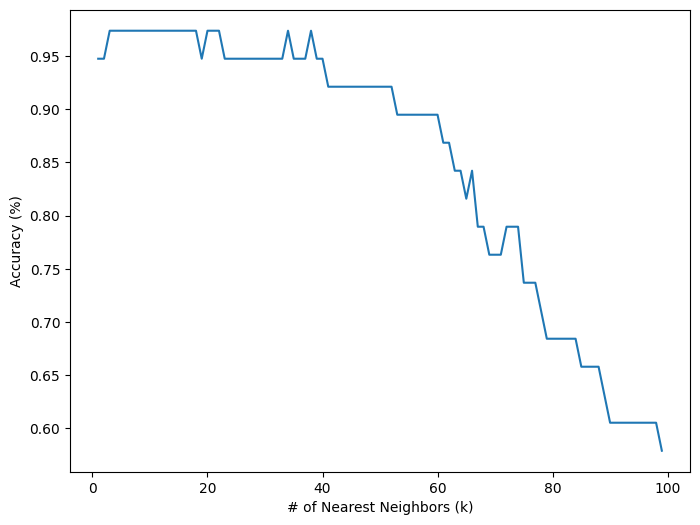

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), acc)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')